In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
grbAG = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS_FBianco/main/data/grb050525A.csv")
grbAG.head()

,filter,time,mag,magerr,upperlimit
0,V,66,13.21,0.24,0
1,V,67,12.90,0.23,0
2,V,68,12.86,0.23,0
3,V,69,13.01,0.23,0
4,V,70,12.97,0.23,0


In [ ]:
grbAG.tail()

,filter,time,mag,magerr,upperlimit
114,W1,63738,21.20,NaN,1
115,M2,74798,21.59,NaN,1
116,U,128928,20.05,NaN,1
117,V,971360,22.09,NaN,1
118,V,1171176,21.16,NaN,1


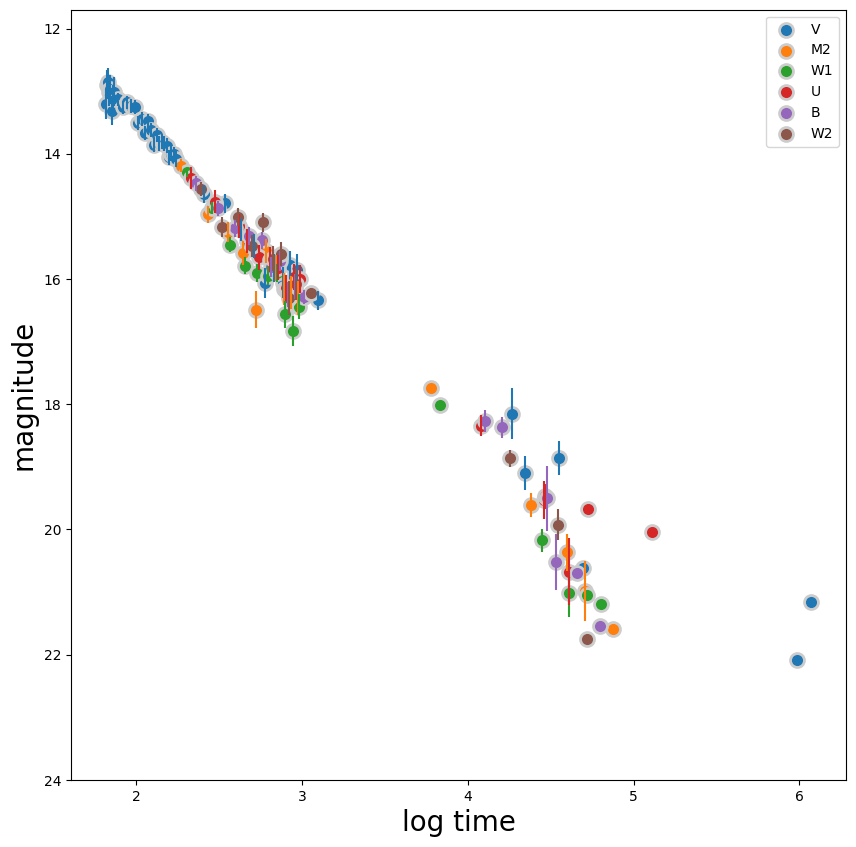

In [ ]:
#create a figure container and an axis object inside of it
ax = pl.figure(figsize=(10,10)).add_subplot(111)
grbAG.time=grbAG.time.astype(float)
grbAG.time=np.log10(grbAG.time)
#loop on every filter to plot - this will give differnt colors naturally.
#Use pl.errorbar to plot the uncertainties

for f in grbAG["filter"].unique():
    pl.errorbar(grbAG.loc[grbAG["filter"] == f, "time"],
                grbAG.loc[grbAG["filter"] == f, "mag"],
                yerr=grbAG.loc[grbAG["filter"] == f, "magerr"],
                fmt='.', ms=0,
                fcolor=None, label=None)

# replot to add a better marker (optional)
for f in grbAG["filter"].unique():
    pl.scatter(grbAG.loc[grbAG["filter"] == f, "time"],
               grbAG.loc[grbAG["filter"] == f, "mag"],
               alpha=1, s=100, linewidth=2,
               label=f,
               edgecolor='#cccccc')


# plot the upperlimits as arrows
nuplim = grbAG.mag.isna().sum()
for i in grbAG[grbAG.upperlimit == 1].index:
    pl.arrow(grbAG.loc[i].time,
             grbAG.loc[i].magerr, 0, 2,
            head_width=0.05, head_length=0.1, ec='k')

# I am going to invert the y axis because the "magnitude" measurement is an inverse scale: brighter is smaller
pl.ylim(24,11.7)
pl.legend()
#Always rememebr you axis labels!!
pl.ylabel("magnitude", fontsize=20)
pl.xlabel("log time", fontsize=20);

In [ ]:
grbAG=grbAG[grbAG.upperlimit==0]
grbAG.rename(columns={'time': 'logtime'}, inplace=True)
grbAG.head()

<ipython-input-18-0b658e7cb361>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grbAG.rename(columns={'time': 'logtime'}, inplace=True)


,filter,logtime,mag,magerr,upperlimit
0,V,1.819544,13.21,0.24,0
1,V,1.826075,12.90,0.23,0
2,V,1.832509,12.86,0.23,0
3,V,1.838849,13.01,0.23,0
4,V,1.845098,12.97,0.23,0


In [ ]:
x = grbAG["logtime"].values
X=np.c_[np.ones(len(x)),x]
y=grbAG['mag'].values
theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta_best

array([8.58266823, 2.51199984])

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.intercept_,lr.coef_[1])

8.582668233648771 2.511999838500421


In [ ]:
from scipy.optimize import minimize

def line(b,a,x):

  return a*x+b

def of(args,x,y):
  intercept,slope=args
  return sum(np.abs(y-line(intercept,slope,x)))

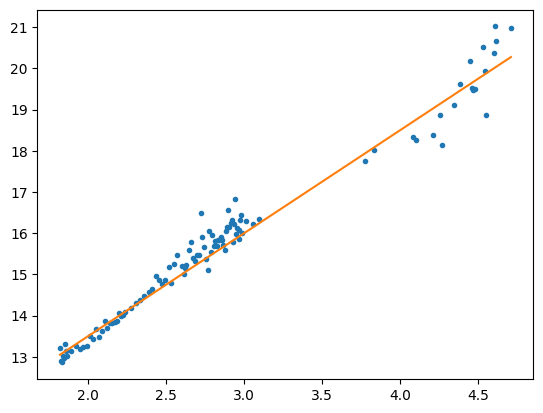

In [ ]:
plt.plot(x,y,'.')
plt.plot(x,line(8.5,2.5,x),'-')

In [ ]:
initialGuess=(10,1)
l1Solution=minimize(of,initialGuess,args=(x,y))
print(l1Solution)

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 26.303317772383874
        x: [ 8.225e+00  2.641e+00]
      nit: 17
      jac: [-1.359e-01 -2.094e+00]
 hess_inv: [[ 1.935e-04 -4.675e-05]
            [-4.675e-05  1.132e-05]]
     nfev: 391
     njev: 125


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(
     X, y, test_size=0.25, random_state=42)

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)
print(reg.score(x_train, y_train))
reg.fit(x_test,y_test)
print(reg.score(x_test,y_test))

0.9716992501494651
0.9742710333378128
